deeplearningwithpython.pdf
200, 6.22

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

# print first 5 elements of input_train
print(input_train[:5])

2024-06-05 15:26:46.073840: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 15:26:46.076137: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 15:26:46.104739: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 15:26:46.692600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 [ 687   23    4 ...   21   64 2574]
 [   0    0    0 ...    7   61  113]]


In [8]:
# input_train, y_train), (input_test, y_test
print(type(input_train), type(y_train), type(input_test), type(y_test))
# print shapes
print(input_train.shape, y_train.shape, input_test.shape, y_test.shape)

# print first 5 elements
print(input_train[:5])




<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000, 500) (25000,) (25000, 500) (25000,)
[[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 [ 687   23    4 ...   21   64 2574]
 [   0    0    0 ...    7   61  113]]


In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - acc: 0.5336 - loss: 0.6892 - val_acc: 0.6742 - val_loss: 0.6105
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.7551 - loss: 0.5233 - val_acc: 0.7488 - val_loss: 0.5079
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.8433 - loss: 0.3674 - val_acc: 0.8204 - val_loss: 0.4194
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.8984 - loss: 0.2595 - val_acc: 0.8186 - val_loss: 0.4303
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9369 - loss: 0.1775 - val_acc: 0.7950 - val_loss: 0.5139
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9618 - loss: 0.1144 - val_acc: 0.8162 - val_loss: 0.4968
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9778 - loss: 0.0743 - val_acc: 0.7814 - val_loss: 0.6739
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9872 - loss: 0.0452 - val_acc: 0.8236 - val_loss: 0.6149
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

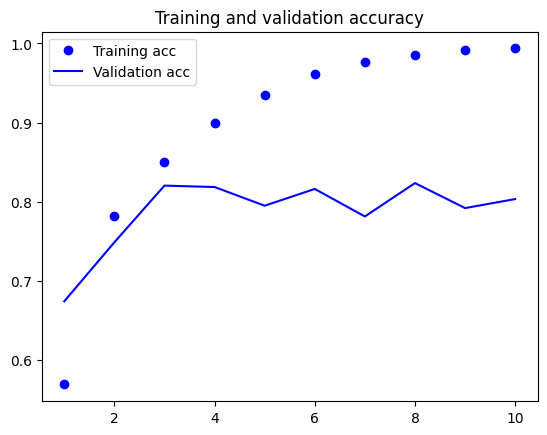

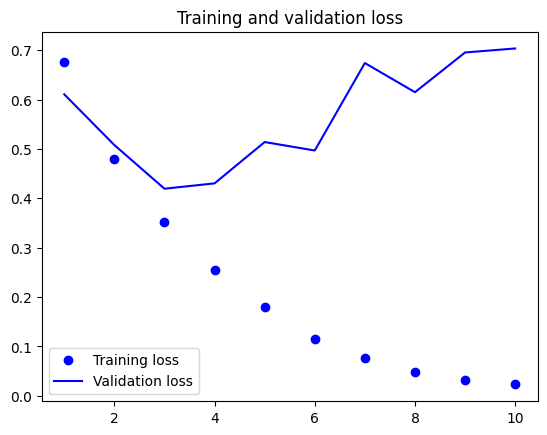

In [4]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')


plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()